# <center>Usecase: Zeta Disease Prediction 

    The Approch in this notebook will NOT take care of imbalance in the dataset. 
    Name: Pradeep Sai Ramisetty 
    

Step1:  Import required Libraries 

In [1]:
# Import required Libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.kde import KernelDensity as kd

Step 2: Load the training dataset and perform Exploratory Data Analysis to understand the data.

In [2]:
# Load the training dataset 
data = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")
data.head(5)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [3]:
#Lets do some EDA to understand the data 
print ("Shape of the data is ", data.shape)
print ("Any Null values:" , pd.isnull(data).values.any())

duplicate_rows_df = data[data.duplicated()]
print("Number of duplicate rows that can be deleted: ", duplicate_rows_df.shape)

# Dropping the duplicates 
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
print ("Shape of the data after deleting duplicate data: ", data.shape)

Shape of the data is  (800, 9)

Any Null values: False
number of duplicate rows:  (5, 9)
Shape of the data after deleting duplicate data:  (795, 9)


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,795.0,30.636478,12.861397,18.0000,21.0000,26.0000,38.0000,109.0000
weight,795.0,172.376101,31.686964,94.0000,150.0000,167.0000,192.0000,308.0000
bmi,795.0,32.230566,8.564706,0.0000,27.3000,32.2000,36.6000,86.1000
blood_pressure,795.0,69.567296,19.922177,0.0000,62.0000,72.0000,80.0000,157.0000
insulin_test,795.0,85.905660,126.687381,0.0000,0.0000,45.0000,130.0000,1077.0000
liver_stress_test,795.0,0.543723,0.348124,0.1408,0.3078,0.4448,0.6998,3.4813
cardio_stress_test,795.0,43.066667,30.495436,0.0000,0.0000,53.0000,62.0000,214.0000
years_smoking,795.0,4.056604,4.177192,0.0000,1.0000,3.0000,6.0000,40.0000
zeta_disease,795.0,0.349686,0.477171,0.0000,0.0000,0.0000,1.0000,1.0000


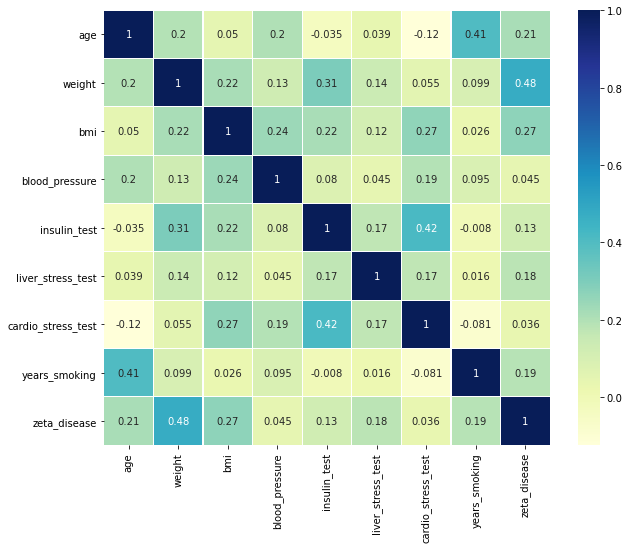

In [34]:
# Finding the relations between the variables.
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Looking at the heatmap, we can clearly say that there is not much multicollinearity in the features. 

Lets see if the dataset is balanced or not.

In [8]:
print("Number of records with disease: ", len(data.loc[ data['zeta_disease']==0 ]))
print("Number of records without disease: ",len(data.loc[ data['zeta_disease']==1 ]))

Number of records with disease:  517
Number of records without disease:  278


The data set is not balanced, we can go for resampling techinques to get the data balanced, but first let us go without modifying.

### Proceeding with Non-Balanced dataset. 

In [9]:
features = ['age','weight','bmi','blood_pressure','insulin_test','liver_stress_test','cardio_stress_test','years_smoking']
predict  = ['zeta_disease']

In [ ]:
prediction_data = pd.read_csv("2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")
prediction_data.head(5)

Step 3: For intial testing the models, lets split the train data into train and split to get the best model.

In [56]:
x_train = data[features][0:700]
y_train = data[predict][0:700]
x_test  = data[features][700:]
y_test  = data[predict][700:]

### Step 4: Lets start Modelling. 

1. Logistic Model 

In [11]:
# sklearn will 
scale = StandardScaler()  
scale.fit(x_train)
x_train_scaled = pd.DataFrame(scale.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scale.transform(x_test), columns=x_test.columns)

In [41]:
# Logistic Train model
log_2 = LogisticRegression(solver='lbfgs', max_iter=500, C=0.1).fit(x_train_scaled, y_train.values.ravel())

# Predict on training set
pred_2 = log_2.predict(x_train_scaled)
pred_test = log_2.predict(x_test_scaled)

# Is our model still predicting just one class?
print("Unique Classes: ", np.unique(pred_2)) 

# How's our accuracy?
print("Training Data Accuracy is: {0:.2f}%".format(metrics.accuracy_score(y_train, pred_2)* 100))
print("Training precision: ", round(metrics.precision_score(y_train, pred_2), 2) )
print("Training Recall: ", round(metrics.recall_score(y_train, pred_2), 2))

print("Test Data Accuracy is    : {0:.2f}%".format(metrics.accuracy_score(y_test, pred_test)* 100))
print("Test precision: ", round(metrics.precision_score(y_test, pred_test), 2) )
print("Test Recall: ", round(metrics.recall_score(y_test, pred_test), 2))


Unique Classes:  [0 1]
Training Data Accuracy is: 78.00%
Training precision:  0.75
Training Recall:  0.55
Test Data Accuracy is    : 76.84%
Test precision:  0.73
Test Recall:  0.61


In [42]:
log_2 = LogisticRegression(solver ='newton-cg').fit(x_train_scaled, y_train.values.ravel())

# Predict on training set
pred_2 = log_2.predict(x_train_scaled)
pred_test = log_2.predict(x_test_scaled)

# Is our model still predicting just one class?
print("Unique Classes: ", np.unique(pred_2)) 

# How's our accuracy?
print("Training Data Accuracy is: {0:.2f}%".format(metrics.accuracy_score(y_train, pred_2)* 100))
print("Training precision: ", round(metrics.precision_score(y_train, pred_2), 2) )
print("Training Recall: ", round(metrics.recall_score(y_train, pred_2), 2))

print("Test Data Accuracy is    : {0:.2f}%".format(metrics.accuracy_score(y_test, pred_test)* 100))
print("Test precision: ", round(metrics.precision_score(y_test, pred_test), 2) )
print("Test Recall: ", round(metrics.recall_score(y_test, pred_test), 2))


Unique Classes:  [0 1]
Training Data Accuracy is: 77.86%
Training precision:  0.73
Training Recall:  0.57
Test Data Accuracy is    : 75.79%
Test precision:  0.71
Test Recall:  0.61


2. MultinomialNB Classification

In [39]:
from sklearn.naive_bayes import MultinomialNB
acc_train = {}
acc_test  = {}
for i in range(1, 51):
    print (" K = ", i)
    nb_model = MultinomialNB(alpha = i)
    nb_model.fit(x_train, y_train.values.ravel())

    nb_pre_train = nb_model.predict(x_train)
    print("Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train.values.ravel(), nb_pre_train)*100))
    acc_train[i] = round(metrics.accuracy_score(y_train, nb_pre_train)*100, 2)
    
    nb_pre_test = nb_model.predict(x_test)
    print("Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test.values.ravel(), nb_pre_test)*100))
    acc_test[i] = round(metrics.accuracy_score(y_test.values.ravel(), nb_pre_test)*100, 2)

 K =  1
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  2
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  3
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  4
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  5
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  6
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  7
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  8
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  9
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  10
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  11
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  12
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  13
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  14
Training Data Accuracy is 61.29%
Test Data Accuracy is 62.11%
 K =  15
Traini

Looks like Multinomial NB is not a great fit for this data. 

3. Decission Tree Classifier

In [18]:
# 3.1 Using Hyperparameter: min_samples_leaf

acc_train = {}
acc_test = {}
threshold = {}
for i in range(4, 65, 4):
    #print " Threshold = ", i
    dtree = DecisionTreeClassifier(min_samples_leaf = i)
    dtree = dtree.fit(x_train, y_train)
    
    threshold[i] = i
    dt_pre_train = dtree.predict(x_train)
    #print "Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train, dt_pre_train)*100)
    acc_train[i] = round(metrics.accuracy_score(y_train, dt_pre_train)*100, 2)
    
    dt_pre_test = dtree.predict(x_test)
    #print "Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test, dt_pre_test)*100)
    acc_test[i] = round(metrics.accuracy_score(y_test, dt_pre_test)*100, 2)
    
DF_Dtree1 = pd.DataFrame(columns = ['Traning_Accuracy', 'Testing_Accuracy'])
DF_Dtree1['Threshold'] = threshold
DF_Dtree1['Traning_Accuracy'] = acc_train.values()
DF_Dtree1['Testing_Accuracy'] = acc_test.values()
DF_Dtree1.sort_values("Threshold", ascending=True)

,Traning_Accuracy,Testing_Accuracy,Threshold
4,90.00,76.84,4
8,86.29,76.84,8
12,84.86,82.11,12
16,82.57,76.84,16
20,81.86,77.89,20
24,80.00,73.68,24
28,79.14,75.79,28
32,79.14,75.79,32
36,79.14,74.74,36
40,78.43,76.84,40


In [19]:
# 3.2 Using Hyperparameter:max_depth

acc_train = {}
acc_test = {}
threshold = {}

for j in range(4, 65, 4):
    #print " Threshold = ", i
    dtree = DecisionTreeClassifier(max_depth= j)
    dtree = dtree.fit(x_train, y_train)
    
    threshold[j] = j
    dt_pre_train = dtree.predict(x_train)
    #print "Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train, dt_pre_train)*100)
    acc_train[j] = round(metrics.accuracy_score(y_train, dt_pre_train)*100, 2)
    
    dt_pre_test = dtree.predict(x_test)
    #print "Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test, dt_pre_test)*100)
    acc_test[j] = round(metrics.accuracy_score(y_test, dt_pre_test)*100, 2)

#DF_Dtree3 = []
DF_Dtree3 = pd.DataFrame(columns = ['Traning_Accuracy', 'Testing_Accuracy'])
DF_Dtree3['Threshold'] = threshold
DF_Dtree3['Traning_Accuracy'] = acc_train.values()
DF_Dtree3['Testing_Accuracy'] = acc_test.values()
DF_Dtree3.sort_values("Threshold", ascending=True)

,Traning_Accuracy,Testing_Accuracy,Threshold
4,79.00,75.79,4
8,93.29,78.95,8
12,99.71,78.95,12
16,100.00,76.84,16
20,100.00,81.05,20
24,100.00,77.89,24
28,100.00,77.89,28
32,100.00,75.79,32
36,100.00,73.68,36
40,100.00,78.95,40


In [20]:
# 3.3 Using Hyperparameter:max_leaf_nodes

acc_train = {}
acc_test = {}
threshold = {}
for i in range(4, 65, 4):
    #print " Threshold = ", i
    dtree = DecisionTreeClassifier(max_leaf_nodes= i)
    dtree = dtree.fit(x_train, y_train)
    
    threshold[i] = i
    dt_pre_train = dtree.predict(x_train)
    #print "Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train, dt_pre_train)*100)
    acc_train[i] = round(metrics.accuracy_score(y_train, dt_pre_train)*100, 2)
    
    dt_pre_test = dtree.predict(x_test)
    #print "Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test, dt_pre_test)*100)
    acc_test[i] = round(metrics.accuracy_score(y_test, dt_pre_test)*100, 2)
    
DF_Dtree4 = pd.DataFrame(columns = ['Traning_Accuracy', 'Testing_Accuracy'])
DF_Dtree4['Threshold'] = threshold
DF_Dtree4['Traning_Accuracy'] = acc_train.values()
DF_Dtree4['Testing_Accuracy'] = acc_test.values()
DF_Dtree4.sort_values("Threshold", ascending=True)

,Traning_Accuracy,Testing_Accuracy,Threshold
4,76.86,78.95,4
8,77.43,76.84,8
12,81.43,76.84,12
16,83.29,75.79,16
20,85.57,77.89,20
24,87.14,76.84,24
28,88.29,80.00,28
32,89.29,76.84,32
36,90.00,76.84,36
40,90.71,75.79,40


In [21]:
# 3.4 Combination of max_leaf_nodes, max_depth, min_samples_leaf

acc_train = {}
acc_test = {}
threshold = {}
for i in range(4, 100, 4):
    #print " Threshold = ", i
    dtree = DecisionTreeClassifier(max_leaf_nodes= i, max_depth=i, min_samples_leaf=i )
    dtree = dtree.fit(x_train, y_train)
    
    threshold[i] = i
    dt_pre_train = dtree.predict(x_train)
    #print "Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train, dt_pre_train)*100)
    acc_train[i] = round(metrics.accuracy_score(y_train, dt_pre_train)*100, 2)
    
    dt_pre_test = dtree.predict(x_test)
    #print "Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test, dt_pre_test)*100)
    acc_test[i] = round(metrics.accuracy_score(y_test, dt_pre_test)*100, 2)
    
DF_Dtree4 = pd.DataFrame(columns = ['Traning_Accuracy', 'Testing_Accuracy'])
DF_Dtree4['Threshold'] = threshold
DF_Dtree4['Traning_Accuracy'] = acc_train.values()
DF_Dtree4['Testing_Accuracy'] = acc_test.values()
DF_Dtree4.sort_values("Threshold", ascending=True)

,Traning_Accuracy,Testing_Accuracy,Threshold
4,76.86,78.95,4
8,77.43,76.84,8
12,82.00,76.84,12
16,82.57,76.84,16
20,81.86,77.89,20
24,80.00,73.68,24
28,79.14,75.79,28
32,79.14,75.79,32
36,79.14,74.74,36
40,78.43,76.84,40


In [22]:
# 3.5 Best combination of max_leaf_nodes, max_depth, min_samples_leaf based on above 

dtree = DecisionTreeClassifier(max_leaf_nodes= 12, max_depth=12, min_samples_leaf=28 )
dtree = dtree.fit(x_train, y_train)

dt_pre_train = dtree.predict(x_train)
print ("Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train, dt_pre_train)*100))

dt_pre_test = dtree.predict(x_test)
print( "Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test, dt_pre_test)*100))

Training Data Accuracy is 79.14%
Test Data Accuracy is 75.79%


4. KNN Classifier

In [28]:
K = [1,3,5,7,9,11,13,15,17,19,21,30]
acc_train = {}
acc_test = {}
prec_tr = {}
recall_tr = {}
prec_ts = {}
recall_ts = {}
for i in K:
    
    print (" K = ", i)
        #DF_KNN_D1.K[i] = i 
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values.ravel())
    knn_predict_train = knn.predict(x_train)
    print("\nTraining data Accuracy is: {0:.2f}%".format(metrics.accuracy_score(y_train, knn_predict_train)*100))
    acc_train[i] = round(metrics.accuracy_score(y_train, knn_predict_train)*100, 2)
    prec_tr[i] =  round(metrics.precision_score(y_train, knn_predict_train), 2)
    recall_tr[i] = round(metrics.recall_score(y_train, knn_predict_train), 2)
    print("Training precision: ",prec_tr[i] )
    print("Training Recall: ",recall_tr[i] )
    
    knn_predict_test = knn.predict(x_test)
    
    print("\nTesting data Accuracy is: {0:.2f}%".format(metrics.accuracy_score(y_test, knn_predict_test)*100))
    acc_test[i] = round(metrics.accuracy_score(y_test, knn_predict_test)*100, 2)
    prec_ts[i] =  round(metrics.precision_score(y_test, knn_predict_test), 2)
    recall_ts[i] = round(metrics.recall_score(y_test, knn_predict_test), 2)
    print("Test precision: ",prec_ts[i] )
    print("Test Recall: ",recall_ts[i] )
    
    

 K =  1

Training data Accuracy is: 100.00%
Training precision:  1.0
Training Recall:  1.0

Testing data Accuracy is: 68.42%
Test precision:  0.59
Test Recall:  0.56
 K =  3

Training data Accuracy is: 85.14%
Training precision:  0.81
Training Recall:  0.74

Testing data Accuracy is: 70.53%
Test precision:  0.67
Test Recall:  0.44
 K =  5

Training data Accuracy is: 80.86%
Training precision:  0.77
Training Recall:  0.64

Testing data Accuracy is: 67.37%
Test precision:  0.6
Test Recall:  0.42
 K =  7

Training data Accuracy is: 79.86%
Training precision:  0.75
Training Recall:  0.62

Testing data Accuracy is: 70.53%
Test precision:  0.65
Test Recall:  0.47
 K =  9

Training data Accuracy is: 80.00%
Training precision:  0.75
Training Recall:  0.64

Testing data Accuracy is: 70.53%
Test precision:  0.65
Test Recall:  0.47
 K =  11

Training data Accuracy is: 78.43%
Training precision:  0.72
Training Recall:  0.61

Testing data Accuracy is: 69.47%
Test precision:  0.63
Test Recall:  0.47

Ideal K is 17 in this case with Training data Accuracy 78.29% and Testing data Accuracy 76.84%

5. SVM Classifier

In [40]:
from sklearn import svm#, grid_search
from sklearn.model_selection import GridSearchCV
#Create a svm Classifier
clf = svm.SVC(kernel='linear', C= 100, gamma = 0.0001) 

params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf'] }

#Train the model using the training sets
clf.fit(x_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(x_train)

print("Accuracy is:",round(metrics.accuracy_score(y_train, y_pred)*100,2))
print("Precision:", round(metrics.precision_score(y_train, y_pred), 2))
print("Recall:", round(metrics.recall_score(y_train, y_pred), 2))

y_pred_test = clf.predict(x_test)

print("\nTest Accuracy is:", round(metrics.accuracy_score(y_test, y_pred_test)*100, 2))
print("Precision:", round(metrics.precision_score(y_test, y_pred_test), 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred_test), 2))

Accuracy is: 77.86
Precision: 0.74
Recall: 0.55

Test Accuracy is: 74.74
Precision: 0.69
Recall: 0.61


6. Random Forrest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=41)
rf_model.fit(x_train, y_train.values.ravel())
rf_predict_train = rf_model.predict(x_train)
print("Training Accuracy is : {0:.2f}%".format(metrics.accuracy_score(y_train.values.ravel(), rf_predict_train)*100))
print("Precision:", round(metrics.precision_score(y_train.values.ravel(), rf_predict_train), 2))
print("Recall:", round(metrics.recall_score(y_train.values.ravel(), rf_predict_train), 2))

rf_predict_test = rf_model.predict(x_test)

print("\nTest Accuracy is:", round(metrics.accuracy_score(y_test.values.ravel(), rf_predict_test)*100, 2))
print("Precision:", round(metrics.precision_score(y_test.values.ravel(), rf_predict_test), 2))
print("Recall:",round(metrics.recall_score(y_test.values.ravel(), rf_predict_test), 2))

Training Accuracy is : 100.00%
Precision: 1.0
Recall: 1.0

Test Accuracy is: 80.0
Precision: 0.74
Recall: 0.72


### Looking at all the models, Random Forrest, Desision tree and seems to be good fit. so let go for both and build the model will complete training data.

In [63]:
# Load the training dataset 
data = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")
prediction_data = pd.read_csv("2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")

data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

x_train = data[features]
y_train = data[predict]
x_test  = prediction_data[features]

1. Decision tree 

In [65]:
# Best combination of max_leaf_nodes, max_depth, min_samples_leaf based on above 

dtree = DecisionTreeClassifier(max_leaf_nodes= 12, max_depth=12, min_samples_leaf=28 )
dtree = dtree.fit(x_train, y_train)

dt_pre_train = dtree.predict(x_train)
print ("Training Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_train, dt_pre_train)*100))
print("Precision:", round(metrics.precision_score(y_train, dt_pre_train), 2))
print("Recall:", round(metrics.recall_score(y_train, dt_pre_train), 2))

dt_pre_test = dtree.predict(x_test)
#print( "Test Data Accuracy is {0:.2f}%".format(metrics.accuracy_score(y_test, dt_pre_test)*100))
prediction_data['zeta_disease_predicted_DTree'] = dt_pre_test
prediction_data

Training Data Accuracy is 80.13%
Precision: 0.78
Recall: 0.6


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,zeta_disease_predicted_DTree
0,24,151,39.5,69,72,1.3968,56,4,NaN,0
1,27,179,35.5,89,156,1.6608,43,6,NaN,0
2,34,147,26.9,76,74,1.6958,53,2,NaN,0
3,35,206,32.4,73,127,1.4608,61,6,NaN,1
4,60,193,29.8,62,192,1.7798,65,9,NaN,0
5,45,120,36.5,108,50,1.2978,54,12,NaN,0
6,20,139,38.2,61,77,1.5818,68,3,NaN,0
7,23,137,31.2,70,73,1.4168,59,7,NaN,0
8,36,195,30.5,59,141,1.4498,59,6,NaN,1
9,19,193,25.8,84,66,1.7938,50,3,NaN,0


2. SVM Classifier

In [66]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C= 100, gamma = 0.0001) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(x_train)

print("Accuracy is:",round(metrics.accuracy_score(y_train, y_pred)*100,2))
print("Precision:", round(metrics.precision_score(y_train, y_pred), 2))
print("Recall:", round(metrics.recall_score(y_train, y_pred), 2))

y_pred_test = clf.predict(x_test)

prediction_data['zeta_disease_predicted_SVC'] = y_pred_test
prediction_data

Accuracy is: 78.36
Precision: 0.73
Recall: 0.61


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,zeta_disease_predicted_DTree,zeta_disease_predicted_SVC
0,24,151,39.5,69,72,1.3968,56,4,NaN,0,1
1,27,179,35.5,89,156,1.6608,43,6,NaN,0,1
2,34,147,26.9,76,74,1.6958,53,2,NaN,0,0
3,35,206,32.4,73,127,1.4608,61,6,NaN,1,1
4,60,193,29.8,62,192,1.7798,65,9,NaN,0,1
5,45,120,36.5,108,50,1.2978,54,12,NaN,0,0
6,20,139,38.2,61,77,1.5818,68,3,NaN,0,1
7,23,137,31.2,70,73,1.4168,59,7,NaN,0,0
8,36,195,30.5,59,141,1.4498,59,6,NaN,1,1
9,19,193,25.8,84,66,1.7938,50,3,NaN,0,1


### Note: More models, Hyperparameter tuning can be done. Also tried other models too but did not wan to clutter the notebook. 